In [118]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 20)
%matplotlib inline
path = os.path.join('cars', 'cars.csv')
cars = pd.read_csv(path)
#cars = cars.dropna

In [119]:
cars

,mileage,displacement,power_kW,power_Hp,transmission,registration,previous_owners,homologation,price,seller_type,seller_country
0,0,5.038,338,460,Manual,ni podatka,ni podatka,ni podatka,63950,Dealer,DE
1,28.570,5.038,331,450,Automatic,2019,2,06/2024,43900,Private seller,DE
2,0,5.038,331,450,Automatic,ni podatka,ni podatka,ni podatka,66080,Dealer,DE
3,44.000,3.720,224,305,Manual,2014,ni podatka,11/2024,19000,Private seller,DE
4,57.081,4.660,147,200,Automatic,1966,ni podatka,ni podatka,39900,Dealer,DE
...,...,...,...,...,...,...,...,...,...,...,...
867,83.921,4.700,147,200,Automatic,1966,ni podatka,05/2024,25000,Private seller,DE
868,80.473,5.038,333,453,Manual,2015,ni podatka,ni podatka,29000,Dealer,DE
869,69.270,5.038,310,421,Automatic,2019,1,ni podatka,40999,Dealer,DE
870,12.000,5.038,358,487,Manual,2021,1,ni podatka,48000,Dealer,DE


Pretvorimo 'ni podatka' v None za lažjo obdelavo.

In [120]:
columns_to_replace = ['mileage', 'displacement', 'power_kW', 'power_Hp', 
                       'transmission', 'registration', 'previous_owners', 
                       'homologation', 'price', 'seller_type', 'seller_country']
for column in columns_to_replace:
    cars[column] = cars[column].replace('ni podatka', None)

Zagotovimo, da so podatki, ki morajo biti števila obravnavani kot 'float'.

In [121]:
float_columns = ['mileage', 'displacement', 'power_kW', 'power_Hp', 'registration', 'previous_owners', 'price', ]
for column in float_columns:
    cars[column] = cars[column].astype(float)

Oglejmo si, kakšna je razporeditev oglaševanih mustangov po državah.  (ker je mobile.de nemška spletna stran, pričakujemo, da jih je največ v Nemčiji - DE)

<Axes: xlabel='seller_country'>

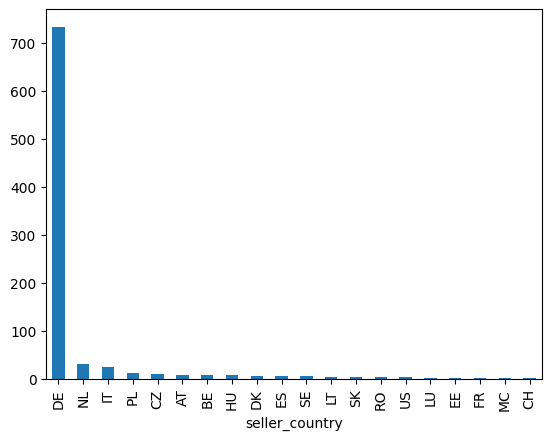

In [122]:
stevilo_mustangov_po_drzavah = cars.groupby(by=['seller_country']).size()
stevilo_mustangov_po_drzavah.sort_values(inplace= True,ascending=False)
stevilo_mustangov_po_drzavah.plot.bar()

Oglejmo si, koliko avtomobilov se prodaja pod 10000€.

In [123]:
columns_to_check = ['price']
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')
cars = cars.dropna(subset=columns_to_check)
affordable_cars = cars[cars['price'].dropna() < 10000]
print(len(affordable_cars))
sorted_affordable_cars = affordable_cars.sort_values(by='price')
sorted_affordable_cars

19


,mileage,displacement,power_kW,power_Hp,transmission,registration,previous_owners,homologation,price,seller_type,seller_country
206,150.000,4.000,157.0,213.0,Manual,2005.0,4.0,None,2750.0,Private seller,DE
693,203.553,3.797,108.0,147.0,Automatic,1997.0,NaN,06/2025,5250.0,Private seller,DE
713,70.000,2.300,67.0,91.0,Manual,1988.0,4.0,06/2024,5500.0,Private seller,DE
233,200.000,4.000,200.0,272.0,Automatic,2006.0,3.0,None,5500.0,Private seller,NL
198,84.800,3.800,104.0,141.0,Automatic,1996.0,4.0,09/2024,6100.0,Private seller,DE
458,221.000,3.797,141.0,192.0,Automatic,2002.0,2.0,None,6690.0,Dealer,DE
36,81.000,NaN,140.0,190.0,Automatic,2002.0,NaN,05/2025,6800.0,Private seller,DE
192,112.131,3.801,106.0,144.0,Automatic,1995.0,3.0,06/2023,6800.0,Private seller,DE
91,210.000,NaN,NaN,NaN,None,2007.0,NaN,None,7000.0,Private seller,DE
524,130.000,2.306,65.0,88.0,Automatic,1990.0,2.0,07/2024,7000.0,Private seller,DE


Oglejmo si kako so avtomobili razporejeni po ceni.

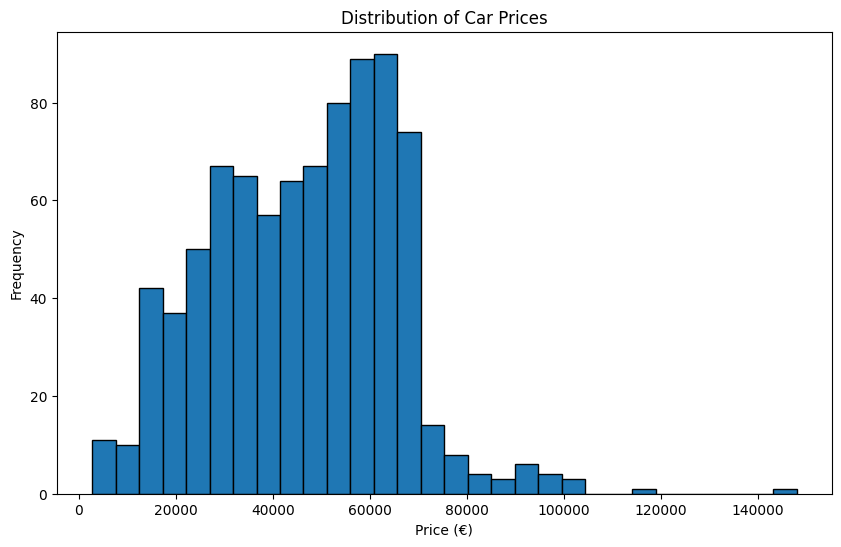

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(cars['price'], bins=30, edgecolor='k')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()


Oglejmo si, kako sta povezana kilometrina in cena.

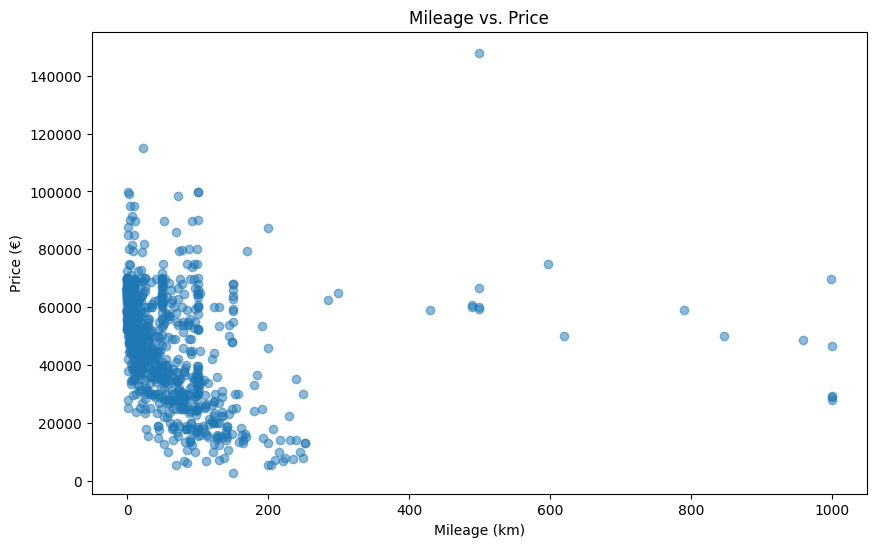

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(cars['mileage'], cars['price'], alpha=0.5)
plt.xlabel('Mileage (km)')
plt.ylabel('Price (€)')
plt.title('Mileage vs. Price')
plt.show()


Poglejmo si, kako je cena odvisna od leta registracije.
(ugotovimo, da je bil na mobile.de pod ford/mustang oglaševan avtomobil, ki ni mustang, saj je bil prvič registriran v letu 1932)

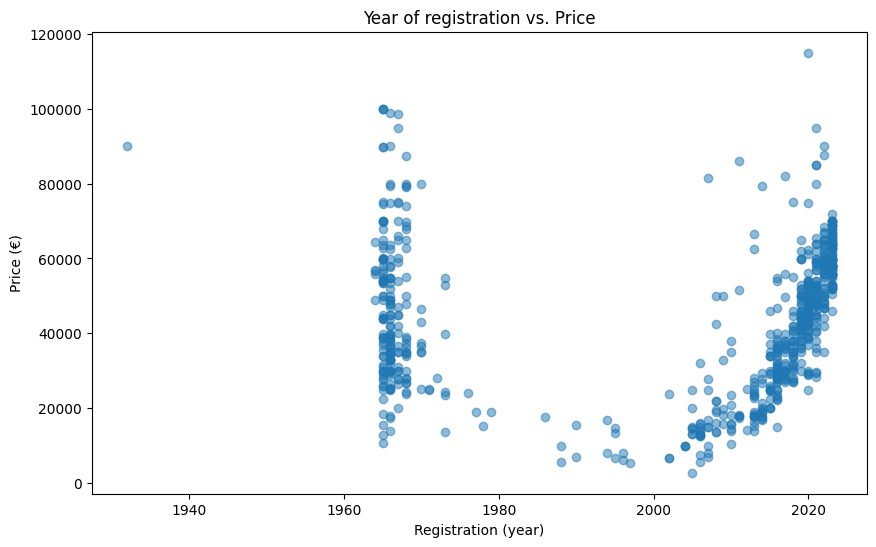

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(cars['registration'], cars['price'], alpha=0.5)
plt.xlabel('Registration (year)')
plt.ylabel('Price (€)')
plt.title('Year of registration vs. Price')
plt.show()

Oglejmo si razmerje med avtomatičnim in ročnim menjalnikom skozi desetletja.

C:\Users\blin\AppData\Local\Temp\ipykernel_13040\3960674417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['decade'] = (cars['registration'] // 10) * 10


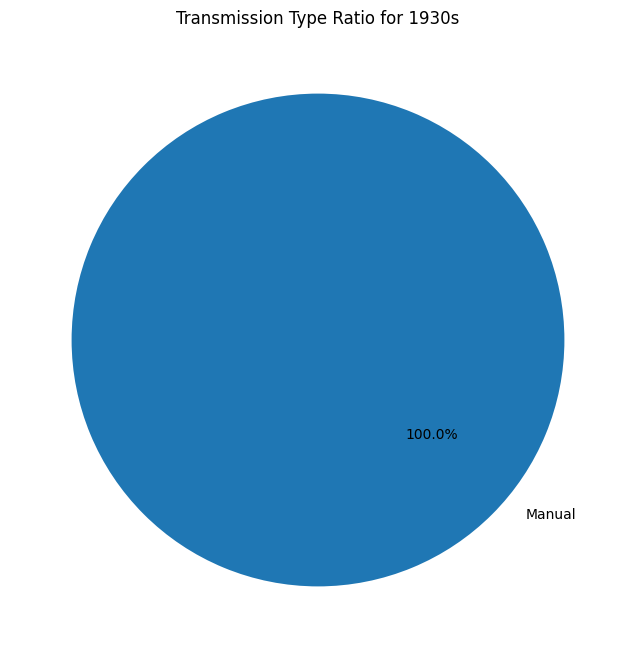

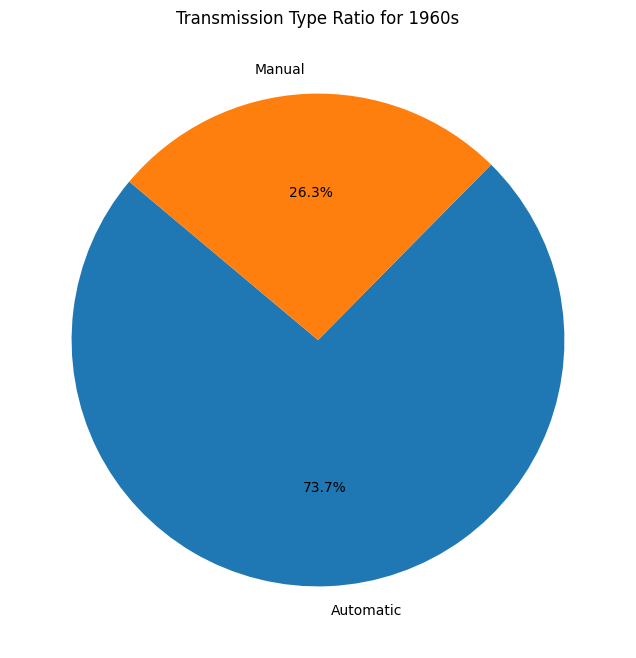

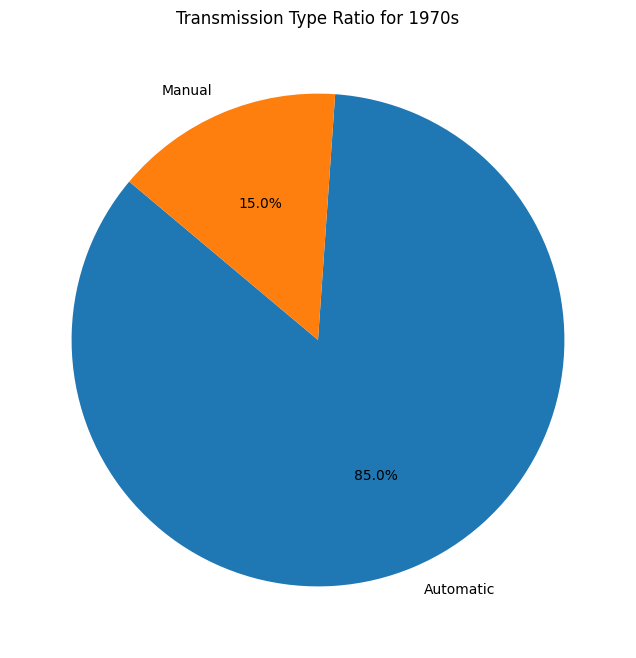

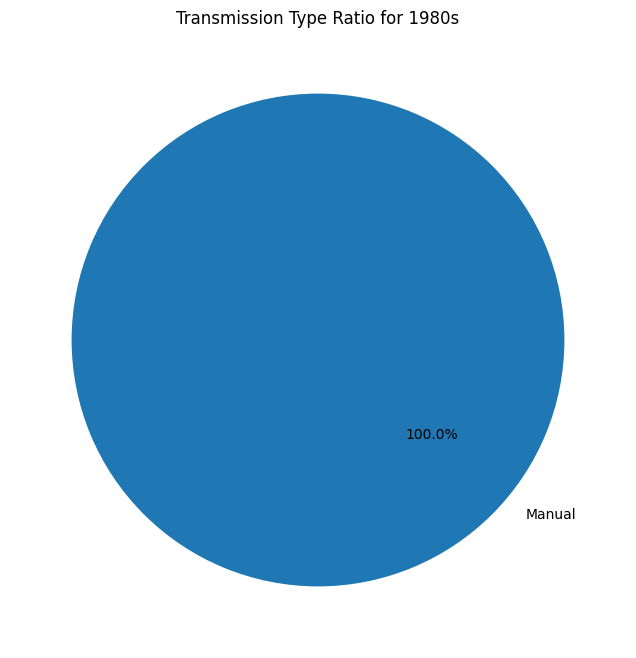

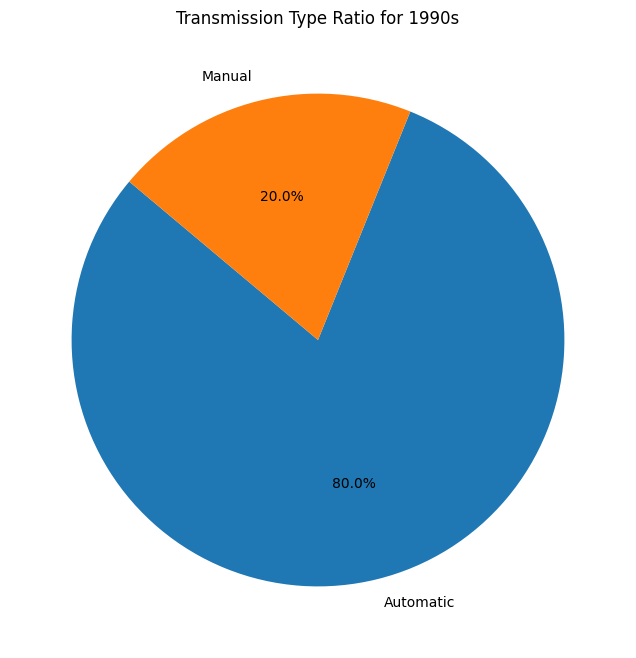

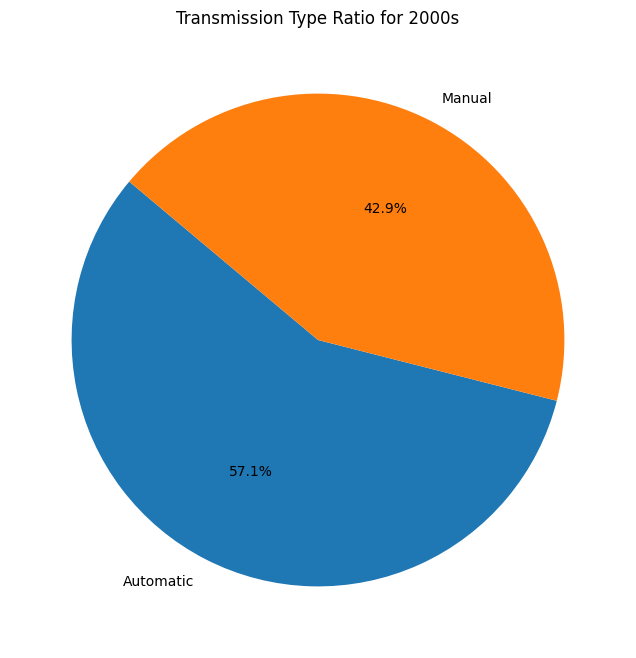

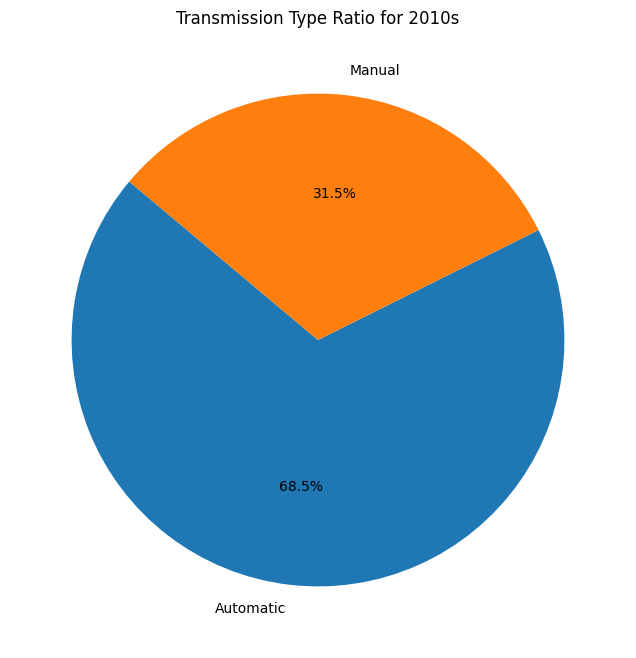

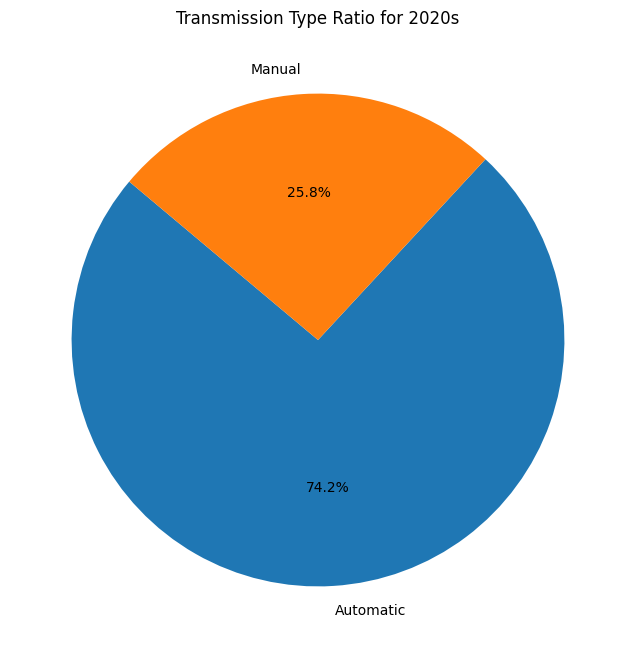

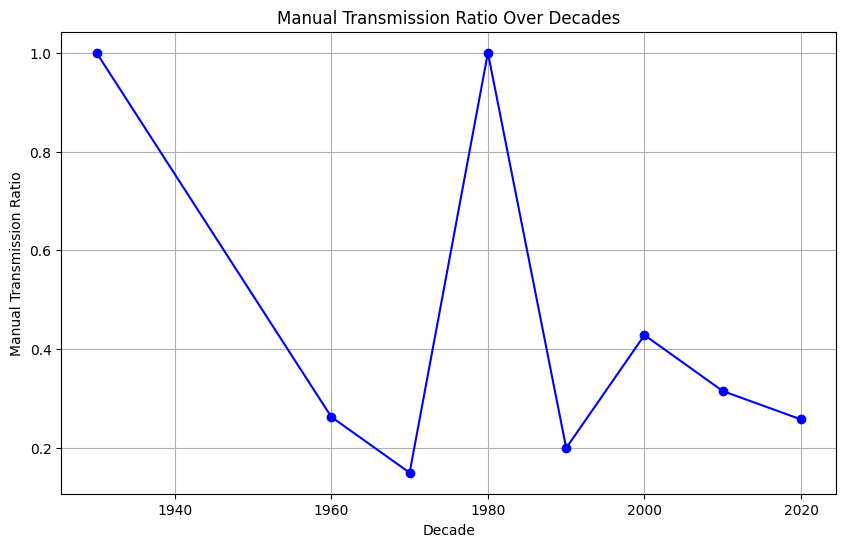

In [127]:
cars['decade'] = (cars['registration'] // 10) * 10

unique_decades = np.sort(cars['decade'].dropna().unique())

decade_labels = []
manual_ratios = []

for decade in unique_decades:
    filtered_cars = cars.loc[cars['decade'] == decade]
    
    transmission_counts = filtered_cars['transmission'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Transmission Type Ratio for {int(decade)}s')
    plt.show()
    
    manual_ratio = transmission_counts.get('Manual', 0) / (transmission_counts.get('Manual', 0) + transmission_counts.get('Automatic', 0))
    
    decade_labels.append(int(decade))
    manual_ratios.append(manual_ratio)

plt.figure(figsize=(10, 6))
plt.plot(decade_labels, manual_ratios, marker='o', linestyle='-', color='b')
plt.title('Manual Transmission Ratio Over Decades')
plt.xlabel('Decade')
plt.ylabel('Manual Transmission Ratio')
plt.grid(True)
plt.show()


Oglejmo si, kako tip prodajalca vpliva na ceno. (pri posameznem prodajalcu (Private seller) pričakujemo nižje cene)

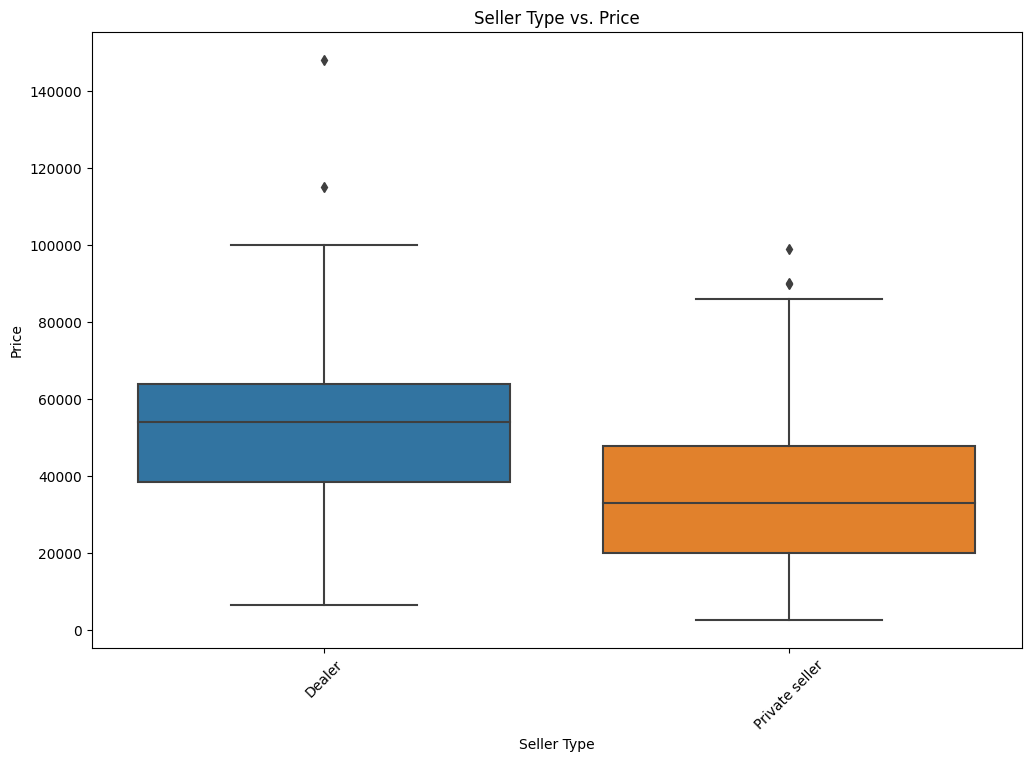

In [128]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='seller_type', y='price', data=cars)
plt.title('Seller Type vs. Price')
plt.xlabel('Seller Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Oglejmo si korelacijo med močjo motorja, ceno, kilometrino, volumnom motorja, letom registracije in številom lastnikov.

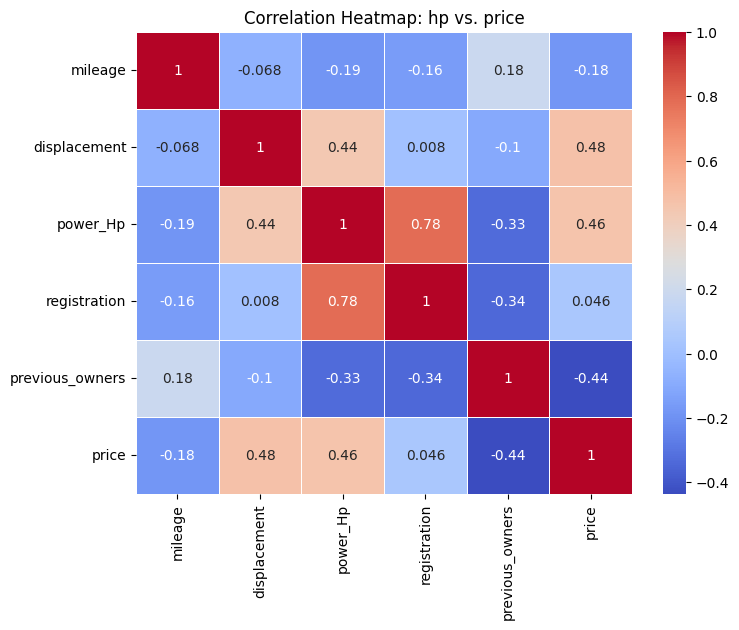

In [131]:
correlation_matrix = cars[['mileage', 'displacement', 'power_Hp', 'registration', 'previous_owners', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap: hp vs. price')
plt.show()

Opazimo naraščanje moči motorja z leti, padanje cene s številom lastnikov, naraščanje cene z močjo in volumnom motorja, povezavo med močjo motorja in volumnom motorja ter manjše število lastnikov pri mlajših avtomobilih. Ostale korelacije so po pričakovanju zanemarljive.

Poiščimo letnik z najcenejšimi in najdražjimi avtomobili.

In [134]:
cars_filtered = cars[cars['registration'] != 1932]

average_price_by_year = cars_filtered.groupby('registration')['price'].mean().reset_index()

most_expensive_year = average_price_by_year[average_price_by_year['price'] == average_price_by_year['price'].max()]

least_expensive_year = average_price_by_year[average_price_by_year['price'] == average_price_by_year['price'].min()]

print("Most Expensive Year (Excluding 1932):")
print(most_expensive_year)

print("\nLeast Expensive Year (Excluding 1932):")
print(least_expensive_year)


Most Expensive Year (Excluding 1932):
    registration         price
40        2023.0  60621.075269

Least Expensive Year (Excluding 1932):
    registration   price
19        1997.0  5250.0


Oglejmo si, kako je cena odvisna od države.

In [136]:
country_price_stats = cars.groupby('seller_country')['price'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()

country_price_stats = country_price_stats.sort_values(by='mean', ascending=False)

print(country_price_stats)


   seller_country  count          mean   median      min       max
2              CZ     10  62050.100000  58549.5  20000.0   99000.0
12             MC      1  59990.000000  59990.0  59990.0   59990.0
8              HU      7  57214.857143  57801.0  49800.0   67381.0
7              FR      1  54990.000000  54990.0  54990.0   54990.0
0              AT      9  51286.555556  56900.0  14999.0   87500.0
11             LU      2  50445.000000  50445.0  49900.0   50990.0
4              DK      6  48483.333333  51750.0  23500.0   63500.0
3              DE    717  46845.171548  48880.0   2750.0  147990.0
14             PL     12  43890.833333  40750.0  13900.0   86000.0
6              ES      4  42200.000000  40700.0  22500.0   64900.0
15             RO      3  41500.000000  42000.0  28000.0   54500.0
9              IT     23  40882.130435  36900.0   7900.0   84900.0
1              BE      8  40874.875000  33000.0  20000.0   75000.0
5              EE      1  40000.000000  40000.0  40000.0   400

Oglejmo si razporegitev homologacije.

C:\Users\blin\AppData\Local\Temp\ipykernel_13040\4292012031.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cars['homologation'] = pd.to_datetime(cars['homologation'])
C:\Users\blin\AppData\Local\Temp\ipykernel_13040\4292012031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['homologation'] = pd.to_datetime(cars['homologation'])
C:\Users\blin\AppData\Local\Temp\ipykernel_13040\4292012031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

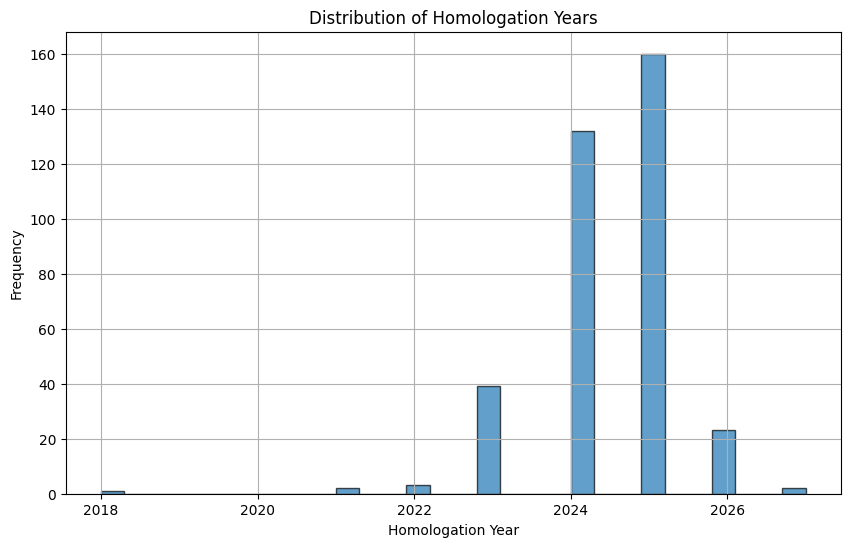

In [137]:
cars['homologation'] = pd.to_datetime(cars['homologation'])

cars['homologation_year'] = cars['homologation'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(cars['homologation_year'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Homologation Year')
plt.ylabel('Frequency')
plt.title('Distribution of Homologation Years')
plt.grid(True)
plt.show()
